<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r2_unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-15-m-1-r2.csv?token=AKVFSOCYDHRURPYLYKRWNRC62AN6Y')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-15-m-11-r2.csv?token=AKVFSOCKOXR2AGQGFWGMFU262AN62')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-4-m-1-r2.csv?token=AKVFSOFZPPMLNCTNSCMG7ZS62AN7M')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-4-m-11-r2.csv?token=AKVFSOCFYAO5VKZIUGRBAC262AN7Q')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-6-m-1-r2.csv?token=AKVFSOEVWLYZVRVS2BFQGO262AOAA')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-6-m-11-r2.csv?token=AKVFSOEDPXCRZP24BDT5POC62AOAE')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-9-m-1-r2.csv?token=AKVFSOAE7CL2RMQHOCDB7SK62AOAS')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-9-m-11-r2.csv?token=AKVFSOCBTWSKVF3CQZJ5VM262AOAW')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-normal-n-0-15-r2.csv?token=AKVFSOF45Y4KHFEDP74WUYK62AOBG')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-normal-n-0-4-r2.csv?token=AKVFSOAOD5POOHPFQD5GEUK62AOBK')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-normal-n-0-6-r2.csv?token=AKVFSOB6S5EAXMXNT7FSRIC62AOBS')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-normal-n-0-9-r2.csv?token=AKVFSOFGKYQ3NFBR66M3I3S62AOBW')

df1['target'] = 0
df2['target'] = 0
df3['target'] = 0
df4['target'] = 0
df5['target'] = 0
df6['target'] = 0
df7['target'] = 0
df8['target'] = 0

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(53621, 30)
(39851, 30)
(53353, 30)
(39884, 30)
(54112, 30)
(40655, 30)
(53593, 30)
(39877, 30)
(31029, 30)
(30992, 30)
(31800, 30)
(30988, 30)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9,0
1,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9,0
2,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9,0
3,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9,0
4,15,2,4,1,1,4,3,10,0,0,23,7,1,4,2,0.500000,12,1,2,2,2,4,8,1,4,4,3,30,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499750,3276535,4,0,6,4,2,3,10,18,2,20,4,30091,3,0,0.000000,25,1,1,1,1,1,0,24,48,1444368,18,30,54,0
499751,3276542,4,0,6,5,3,3,10,18,2,20,4,30091,3,0,0.000000,32,1,1,1,1,1,0,30,90,2708190,18,30,54,0
499752,3276543,4,0,2,1,4,3,11,18,2,20,4,30092,3,0,0.000000,32,1,1,1,1,1,0,2,8,240736,6,33,18,0
499753,3276544,2,0,7,1,4,3,12,18,2,15,15,30091,4,0,0.000000,6,1,1,1,1,1,0,7,28,842548,21,36,63,0


In [0]:
df.shape

(499755, 30)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-15-m-12-r2.csv?token=AKVFSOFMESJW3XDJKPCJNSC62AN7A')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-15-m-7-r2.csv?token=AKVFSOEKH6JEFOMOE4YQFWC62AN7G')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-4-m-12-r2.csv?token=AKVFSOEUJFROKVU5HGRRHOC62AQDE')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-4-m-7-r2.csv?token=AKVFSOHB26JO7UQHCQUEWQS62AN74')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-6-m-12-r2.csv?token=AKVFSOAVUCCQGJV4Y7355CS62AOAK')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-6-m-7-r2.csv?token=AKVFSOC4PSW5DJ2KZ3ZLTGS62AOAO')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-9-m-12-r2.csv?token=AKVFSOHQMSVA5NDAMCHC4M262AOA4')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r2/2-fft-malicious-n-0-9-m-7-r2.csv?token=AKVFSOFAVN5BAVDUS5MCCEK62AOBA')

In [0]:
df13['target'] = 0
df14['target'] = 0
df15['target'] = 0
df16['target'] = 0
df17['target'] = 0
df18['target'] = 0
df19['target'] = 0
df20['target'] = 0

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(39884, 30)
(39851, 30)
(39303, 30)
(39884, 30)
(40074, 30)
(40633, 30)
(39303, 30)
(39884, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9,0
1,15,2,4,1,1,4,3,10,0,0,23,7,1,4,2,0.500000,12,1,2,2,2,4,8,1,4,4,3,30,9,0
2,218,1,4,1,1,4,3,9,1,1,22,6,8,2,1,0.500000,8,1,1,1,1,1,4,1,4,32,3,27,9,0
3,240,1,4,1,1,4,3,9,0,0,22,6,9,3,2,0.666667,12,1,1,1,1,1,4,1,4,36,3,27,9,0
4,328,2,4,1,1,4,3,9,1,1,23,7,11,3,1,0.333333,8,2,1,2,2,4,8,1,4,44,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54107,3266088,1,4,5,2,2,3,9,0,0,22,6,30087,3,2,0.666667,19,2,3,4,6,24,4,10,20,601740,15,27,45,0
54108,3266095,1,4,5,3,2,3,9,0,0,22,6,30087,3,2,0.666667,26,1,4,4,4,16,4,15,30,902610,15,27,45,0
54109,3266102,1,4,5,4,2,3,9,0,0,22,6,30087,3,2,0.666667,33,3,1,3,3,9,4,20,40,1203480,15,27,45,0
54110,3266109,1,4,5,5,3,3,9,0,0,22,6,30087,3,2,0.666667,40,2,2,3,4,12,4,25,75,2256525,15,27,45,0


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.512345,0.321716,0.002674,-0.003928,NaN,0.358342,-0.043400,0.189797,-0.741610,-0.845602,-0.218185,-0.035778,0.132104,0.058984,0.063731,0.049573,0.302289,0.134549,0.121475,0.058313,0.321716,0.358342,0.321716,0.000574
inport,-0.512345,1.000000,-0.229030,0.066325,-0.097494,NaN,-0.464970,0.055159,0.255582,0.489028,0.391905,0.222885,-0.001081,-0.130287,-0.080441,-0.093130,-0.087977,0.531595,-0.044745,-0.061206,-0.012764,-0.229030,-0.464970,-0.229030,-0.001587
cache_coherence_type,0.321716,-0.229030,1.000000,0.358016,-0.526208,NaN,-0.112834,-0.002491,-0.031520,-0.301502,-0.283410,-0.520338,0.030441,-0.014508,0.009756,0.019320,0.017259,0.016835,0.534073,0.434951,0.298318,1.000000,-0.112834,1.000000,-0.000497
flit_id,0.002674,0.066325,0.358016,1.000000,-0.088306,NaN,-0.235956,0.017917,0.046477,0.005149,-0.003354,0.533402,0.039272,0.014020,0.032633,0.046305,0.029638,0.038602,0.973599,0.930942,0.667498,0.358016,-0.235956,0.358016,0.000177
flit_type,-0.003928,-0.097494,-0.526208,-0.088306,1.000000,NaN,0.346810,-0.026343,-0.068327,-0.007575,0.004931,0.481207,-0.091949,0.122771,0.018874,-0.004511,-0.004473,-0.056747,-0.177662,0.088300,0.056638,-0.526208,0.346810,-0.526208,-0.000281
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.358342,-0.464970,-0.112834,-0.235956,0.346810,NaN,1.000000,-0.006576,-0.181618,-0.465512,-0.391677,-0.048398,-0.010099,0.162923,0.093579,0.090308,0.082384,-0.302288,-0.204429,-0.120465,-0.090758,-0.112834,1.000000,-0.112834,-0.008380
traversal_id,-0.043400,0.055159,-0.002491,0.017917,-0.026343,NaN,-0.006576,1.000000,0.030882,0.008236,-0.007589,0.025340,-0.002631,-0.002606,-0.003207,-0.002453,-0.001007,0.007667,0.009992,0.004520,0.547177,-0.002491,-0.006576,-0.002491,-0.245792
hop_count,0.189797,0.255582,-0.031520,0.046477,-0.068327,NaN,-0.181618,0.030882,1.000000,0.220360,-0.341015,0.121495,-0.110117,-0.054916,-0.101055,-0.088831,-0.081823,0.552140,0.036635,0.012762,0.024173,-0.031520,-0.181618,-0.031520,0.066816
current_hop,-0.741610,0.489028,-0.301502,0.005149,-0.007575,NaN,-0.465512,0.008236,0.220360,1.000000,0.802050,0.307414,-0.012723,-0.155179,-0.102811,-0.098342,-0.078225,0.099089,-0.109052,-0.105405,-0.067138,-0.301502,-0.465512,-0.301502,0.081322


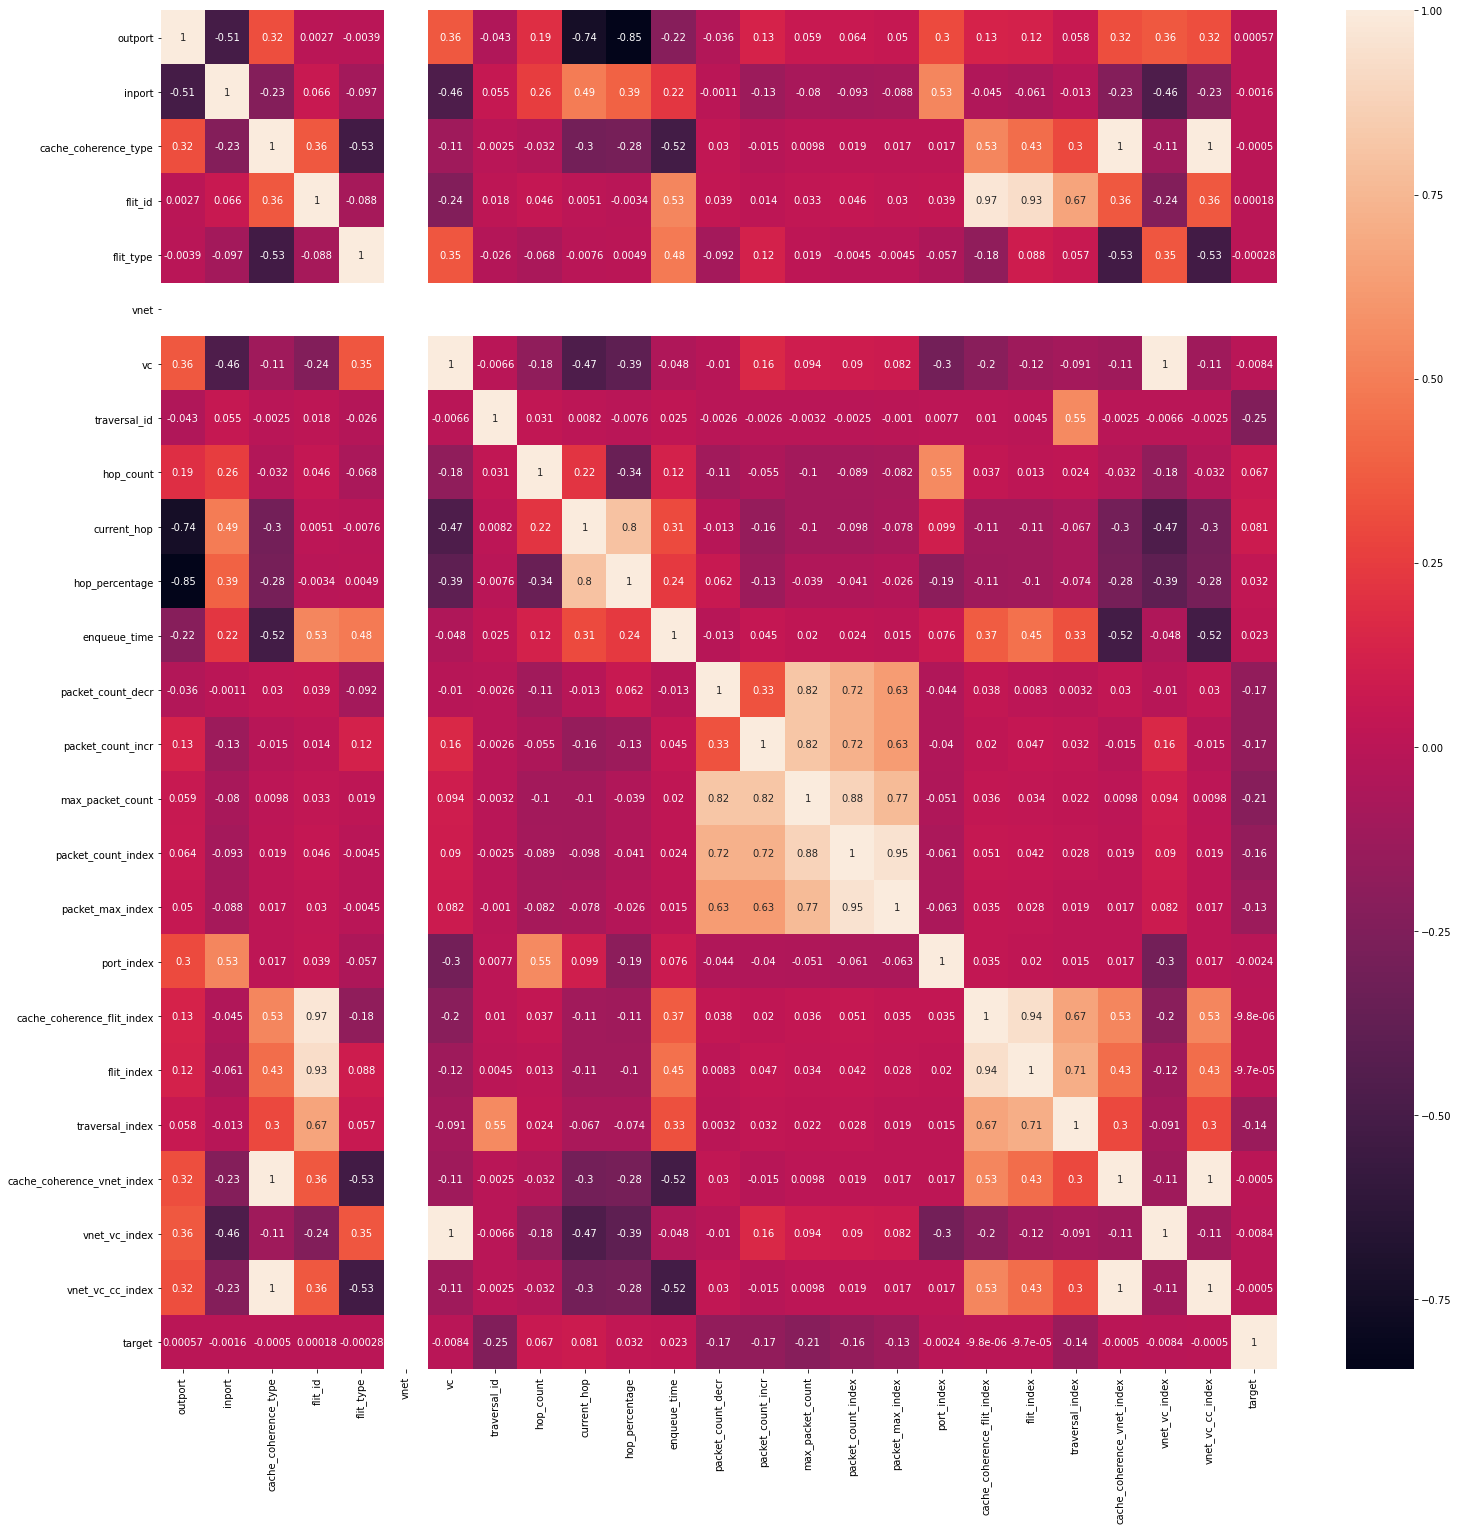

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,4,1,1,4,3,9,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9
1,2,4,1,1,4,3,9,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9
2,2,4,1,1,4,3,9,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9
3,2,4,1,1,4,3,9,2,3,1,0.333333,8,2,1,2,2,4,8,1,4,8,3,27,9
4,2,4,1,1,4,3,10,1,4,2,0.500000,12,1,2,2,2,4,8,1,4,4,3,30,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499750,4,0,6,4,2,3,10,30091,3,0,0.000000,25,1,1,1,1,1,0,24,48,1444368,18,30,54
499751,4,0,6,5,3,3,10,30091,3,0,0.000000,32,1,1,1,1,1,0,30,90,2708190,18,30,54
499752,4,0,2,1,4,3,11,30092,3,0,0.000000,32,1,1,1,1,1,0,2,8,240736,6,33,18
499753,2,0,7,1,4,3,12,30091,4,0,0.000000,6,1,1,1,1,1,0,7,28,842548,21,36,63


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.25,0.333333,0.066667,0.030303,0.000000,0.030303,0.003279,0.000288,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.25,0.333333,0.066667,0.030303,0.000000,0.030303,0.003279,0.000288,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.25,0.333333,0.066667,0.030303,0.000000,0.030303,0.003279,0.000288,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.25,0.333333,0.066667,0.030303,0.000000,0.030303,0.003279,0.000288,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
4,0.5,1.00,0.000000,0.00,1.000000,0.0,0.333333,0.000000,0.6,0.50,0.500000,0.133333,0.000000,0.030303,0.030303,0.003279,0.000288,1.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499750,1.0,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.999900,0.4,0.00,0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533333,0.833333,0.333333,0.833333
499751,1.0,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.999900,0.4,0.00,0.000000,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
499752,1.0,0.00,0.166667,0.00,1.000000,0.0,0.666667,0.999934,0.4,0.00,0.000000,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.088890,0.166667,0.666667,0.166667
499753,0.5,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.999900,0.6,0.00,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,0.279070,0.311110,1.000000,1.000000,1.000000


In [0]:
train_X[train_X.duplicated()].shape

(48351, 24)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(32, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.4,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000233,0.25,0.4,0.666667,0.133333,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000333,0.50,0.4,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000
3,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000632,0.50,0.4,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000
4,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000831,0.75,0.4,0.400000,0.133333,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.000037,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39879,1.00,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.25,0.0,0.000000,0.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533333,0.833333,0.333333,0.833333
39880,1.00,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.25,0.0,0.000000,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
39881,1.00,0.00,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.25,0.0,0.000000,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088890,0.166667,0.666667,0.166667
39882,0.50,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.999967,0.50,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311110,1.000000,1.000000,1.000000


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(24, 24)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(27, 24)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(27, 24)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(27, 24)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(32, 24)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(29, 24)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(32, 24)


In [0]:
test_X8 = test_X[:30000]
test_X9 = test_X1[:30000]
test_X10  = test_X2[:30000]
test_X11  = test_X3[:30000]
test_X12  = test_X4[:30000]
test_X13  = test_X5[:30000]
test_X14  = test_X6[:30000]
test_X15  = test_X7[:30000]

test_Y8 = test_Y[:30000]
test_Y9 = test_Y1[:30000]
test_Y10  = test_Y2[:30000]
test_Y11  = test_Y3[:30000]
test_Y12  = test_Y4[:30000]
test_Y13  = test_Y5[:30000]
test_Y14  = test_Y6[:30000]
test_Y15  = test_Y7[:30000]

test_X8

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.50,0.4,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000233,0.25,0.4,0.666667,0.133333,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
2,0.50,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000333,0.50,0.4,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000
3,0.50,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000632,0.50,0.4,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000
4,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000831,0.75,0.4,0.400000,0.133333,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.000037,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.00,0.166667,0.0,1.0,0.0,0.000000,0.735634,0.25,0.0,0.000000,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.065391,0.166667,0.000000,0.166667
29996,1.00,0.00,1.000000,0.0,1.0,0.0,0.333333,0.735601,0.75,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.228863,1.000000,0.333333,1.000000
29997,0.00,0.25,0.333333,0.0,1.0,0.0,0.000000,0.735634,0.25,0.6,1.000000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.098088,0.333333,0.000000,0.333333
29998,0.50,1.00,1.000000,0.0,1.0,0.0,0.000000,0.736532,1.00,0.4,0.333333,0.150000,0.0,0.0,0.0,0.0,0.0,1.0,0.206897,0.279070,0.229153,1.000000,0.000000,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    374946
1    124809
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  4953.286940
7                 traversal_id  4302.990399
13           packet_count_incr  2487.707508
12           packet_count_decr  2465.608758
15          packet_count_index  1597.296807
20             traversal_index  1468.409959
16            packet_max_index   748.636521
9                  current_hop   363.563025
8                    hop_count   170.480747
10              hop_percentage    90.316521
11                enqueue_time    24.169740
6                           vc    12.895553
22               vnet_vc_index    12.895553
17                  port_index     0.441470
0                      outport     0.139982
2         cache_coherence_type     0.112123
21  cache_coherence_vnet_index     0.112123


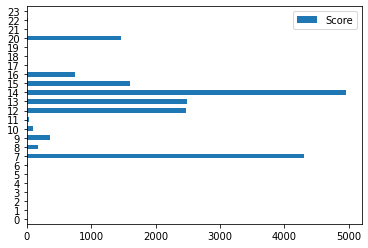

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 76.90643415273483
Test Prediction  76.79062740742964


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X7)
logreg_score_test = accuracy_score(test_Y7,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  94.03018754387725
Test Prediction  94.76550149306165
Test Prediction  95.48889397755896
Test Prediction  85.7963092969612
Test Prediction  94.26061785696461
Test Prediction  83.46910146924913
Test Prediction  95.59830038419459
Test Prediction  86.3604452913449


In [0]:
y_pred_test = logreg.predict(test_X8)
logreg_score_test = accuracy_score(test_Y8,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X9)
logreg_score_test = accuracy_score(test_Y9,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X10)
logreg_score_test = accuracy_score(test_Y10,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X11)
logreg_score_test = accuracy_score(test_Y11,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X12)
logreg_score_test = accuracy_score(test_Y12,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X13)
logreg_score_test = accuracy_score(test_Y13,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X14)
logreg_score_test = accuracy_score(test_Y14,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X15)
logreg_score_test = accuracy_score(test_Y15,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.06333333333333
Test Prediction  93.04666666666667
Test Prediction  94.08999999999999
Test Prediction  81.11666666666667
Test Prediction  92.33333333333333
Test Prediction  77.61
Test Prediction  94.23333333333333
Test Prediction  81.86666666666666


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
16,packet_max_index,5.914642
0,outport,3.947159
15,packet_count_index,3.900977
9,current_hop,2.899753
1,inport,1.896297
8,hop_count,1.339194
10,hop_percentage,1.256002
11,enqueue_time,1.241835
3,flit_id,1.019807
21,cache_coherence_vnet_index,0.451599


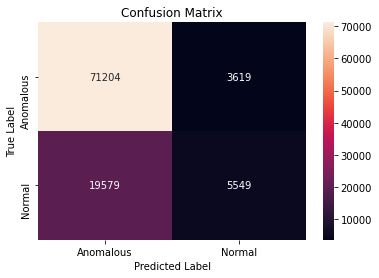

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     74823
           1       0.61      0.22      0.32     25128

    accuracy                           0.77     99951
   macro avg       0.69      0.59      0.59     99951
weighted avg       0.74      0.77      0.73     99951



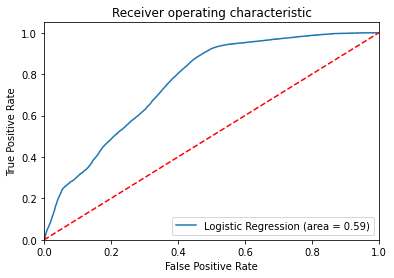

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

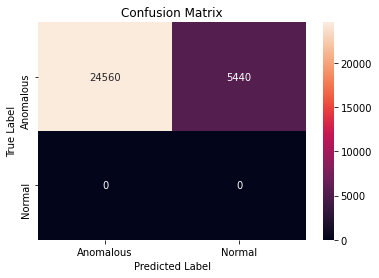

In [0]:
cm = confusion_matrix(test_Y15, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.82     30000
   macro avg       0.50      0.41      0.45     30000
weighted avg       1.00      0.82      0.90     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 89.54162539644426
Test Prediction  83.76704585246772


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X7)
knn_score_test = accuracy_score(test_Y7,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  84.90873533246415
Test Prediction  86.07814107550627
Test Prediction  87.55820166399512
Test Prediction  91.33737839735232
Test Prediction  86.5149473474073
Test Prediction  88.98432308714591
Test Prediction  87.32666717553369
Test Prediction  91.4577274094875


In [0]:
y_pred_knn_test= knn.predict(test_X8)
knn_score_test = accuracy_score(test_Y8,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X9)
knn_score_test = accuracy_score(test_Y9,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X10)
knn_score_test = accuracy_score(test_Y10,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X11)
knn_score_test = accuracy_score(test_Y11,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X12)
knn_score_test = accuracy_score(test_Y12,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X13)
knn_score_test = accuracy_score(test_Y13,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X14)
knn_score_test = accuracy_score(test_Y14,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X15)
knn_score_test = accuracy_score(test_Y15,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  79.93666666666667
Test Prediction  81.50666666666667
Test Prediction  83.72
Test Prediction  88.48333333333333
Test Prediction  82.0
Test Prediction  85.08666666666667
Test Prediction  83.39666666666666
Test Prediction  88.64333333333333


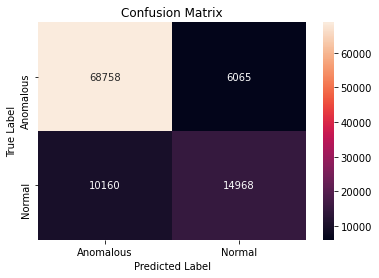

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     74823
           1       0.71      0.60      0.65     25128

    accuracy                           0.84     99951
   macro avg       0.79      0.76      0.77     99951
weighted avg       0.83      0.84      0.83     99951



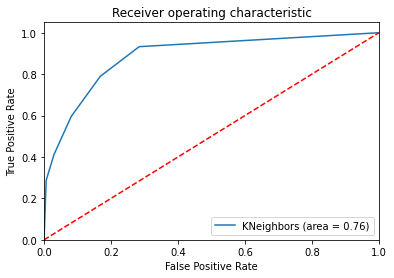

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

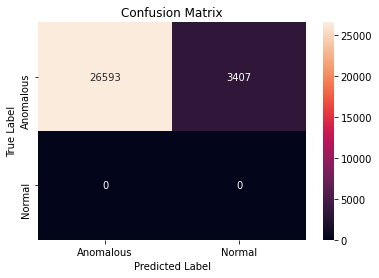

In [0]:
cm = confusion_matrix(test_Y15, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.89     30000
   macro avg       0.50      0.44      0.47     30000
weighted avg       1.00      0.89      0.94     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 49.45573330932157
Test Prediction Score 49.62731738551891


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X7)
nb_score_test = accuracy_score(test_Y7,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 26.569551699929793
Test Prediction  26.947880856189304
Test Prediction  26.738416914739332
Test Prediction  27.54237288135593
Test Prediction  28.429904676348755
Test Prediction  27.177417370117883
Test Prediction  26.468717400707327
Test Prediction  27.70534550195567


In [0]:
y_pred_nb_test= nb.predict(test_X8)
nb_score_test = accuracy_score(test_Y8,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X9)
nb_score_test = accuracy_score(test_Y9,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X10)
nb_score_test = accuracy_score(test_Y10,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X11)
nb_score_test = accuracy_score(test_Y11,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X12)
nb_score_test = accuracy_score(test_Y12,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X13)
nb_score_test = accuracy_score(test_Y13,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X14)
nb_score_test = accuracy_score(test_Y14,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X15)
nb_score_test = accuracy_score(test_Y15,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 18.38
Test Prediction  18.64666666666667
Test Prediction  18.71666666666667
Test Prediction  19.433333333333334
Test Prediction  20.536666666666665
Test Prediction  18.446666666666665
Test Prediction  18.35333333333333
Test Prediction  19.596666666666668


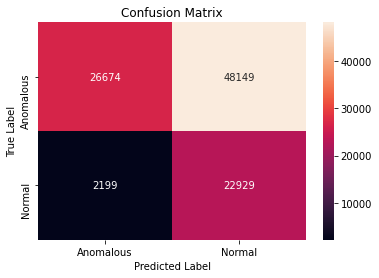

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.36      0.51     74823
           1       0.32      0.91      0.48     25128

    accuracy                           0.50     99951
   macro avg       0.62      0.63      0.50     99951
weighted avg       0.77      0.50      0.50     99951



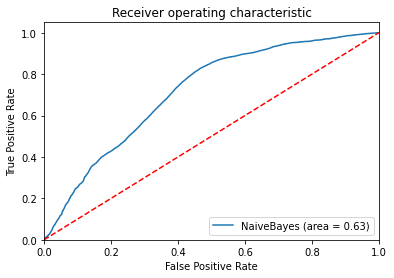

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 319843 samples, validate on 79961 samples
Epoch 1/15
319843/319843 [==============================] - 12s 39us/step - loss: 0.1677 - accuracy: 0.7489 - val_loss: 0.1634 - val_accuracy: 0.7483
Epoch 2/15
319843/319843 [==============================] - 12s 38us/step - loss: 0.1620 - accuracy: 0.7513 - val_loss: 0.1622 - val_accuracy: 0.7483
Epoch 3/15
319843/319843 [==============================] - 12s 38us/step - loss: 0.1610 - accuracy: 0.7513 - val_loss: 0.1613 - val_accuracy: 0.7483
Epoch 4/15
319843/319843 [==============================] - 12s 38us/step - loss: 0.1604 - accuracy: 0.7531 - val_loss: 0.1609 - val_accuracy: 0.7486
Epoch 5/15
319843/319843 [==============================] - 12s 38us/step - loss: 0.1598 - accuracy: 0.7581 - val_loss: 0.1604 - val_accuracy: 0.7528
Epoch 6/15
319843/319843 [==============================] - 12s 39us/step - loss: 0.1592 - accuracy: 0.7613 - val_loss: 0.1592 - val_accuracy: 0.7600
Epoch 7/15
319843/319843 [=======================

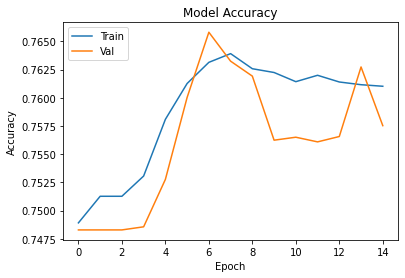

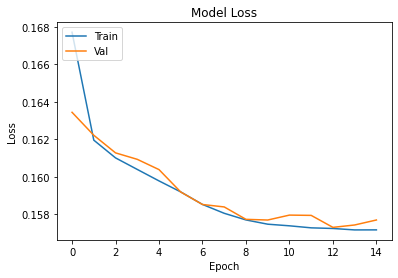

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.78%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.85%
accuracy: 93.32%
accuracy: 97.02%
accuracy: 66.28%
accuracy: 97.12%
accuracy: 69.02%
accuracy: 97.05%
accuracy: 66.72%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 95.81%
accuracy: 91.13%
accuracy: 96.09%
accuracy: 55.21%
accuracy: 96.15%
accuracy: 58.14%
accuracy: 96.13%
accuracy: 55.79%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 319843 samples, validate on 79961 samples
Epoch 1/15
319843/319843 [==============================] - 12s 37us/step - loss: 0.1876 - accuracy: 0.7513 - val_loss: 0.1858 - val_accuracy: 0.7483
Epoch 2/15
319843/319843 [==============================] - 12s 37us/step - loss: 0.1782 - accuracy: 0.7513 - val_loss: 0.1724 - val_accuracy: 0.7483
Epoch 3/15
319843/319843 [==============================] - 12s 37us/step - loss: 0.1664 - accuracy: 0.7513 - val_loss: 0.1644 - val_accuracy: 0.7483
Epoch 4/15
319843/319843 [==============================] - 12s 38us/step - loss: 0.1621 - accuracy: 0.7517 - val_loss: 0.1619 - val_accuracy: 0.7563
Epoch 5/15
319843/319843 [==============================] - 12s 38us/step - loss: 0.1603 - accuracy: 0.7587 - val_loss: 0.1610 - val_accuracy: 0.7557
Epoch 6/15
319843/319843 [==============================] - 12s 38us/step - loss: 0.1592 - accuracy: 0.7604 - val_loss: 0.1599 - val_accuracy: 0.7579
Epoch 7/15
319843/319843 [=======================

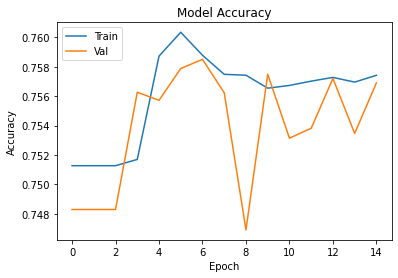

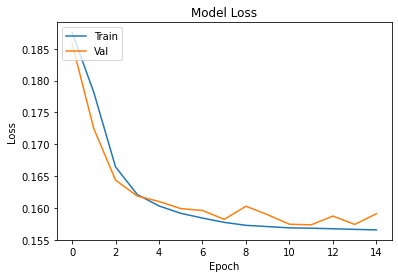

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.70%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.93%
accuracy: 98.18%
accuracy: 99.89%
accuracy: 84.99%
accuracy: 99.88%
accuracy: 82.28%
accuracy: 99.90%
accuracy: 85.69%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.91%
accuracy: 97.58%
accuracy: 99.86%
accuracy: 80.05%
accuracy: 99.84%
accuracy: 76.00%
accuracy: 99.87%
accuracy: 80.98%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 319843 samples, validate on 79961 samples
Epoch 1/30
319843/319843 [==============================] - 13s 39us/step - loss: 0.1796 - accuracy: 0.7513 - val_loss: 0.1686 - val_accuracy: 0.7483
Epoch 2/30
319843/319843 [==============================] - 13s 39us/step - loss: 0.1636 - accuracy: 0.7513 - val_loss: 0.1617 - val_accuracy: 0.7483
Epoch 3/30
319843/319843 [==============================] - 13s 39us/step - loss: 0.1589 - accuracy: 0.7514 - val_loss: 0.1576 - val_accuracy: 0.7582
Epoch 4/30
319843/319843 [==============================] - 13s 39us/step - loss: 0.1563 - accuracy: 0.7579 - val_loss: 0.1557 - val_accuracy: 0.7533
Epoch 5/30
319843/319843 [==============================] - 13s 40us/step - loss: 0.1551 - accuracy: 0.7574 - val_loss: 0.1547 - val_accuracy: 0.7586
Epoch 6/30
319843/319843 [==============================] - 13s 39us/step - loss: 0.1540 - accuracy: 0.7577 - val_loss: 0.1543 - val_accuracy: 0.7567
Epoch 7/30
319843/319843 [=======================

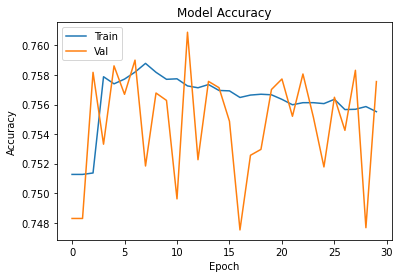

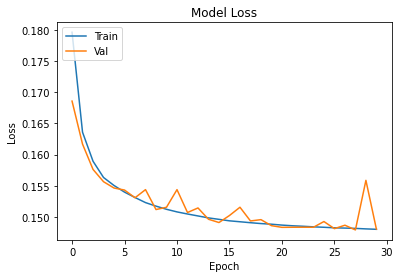

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.49%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.64%
accuracy: 86.68%
accuracy: 99.61%
accuracy: 61.39%
accuracy: 99.69%
accuracy: 66.01%
accuracy: 99.56%
accuracy: 61.83%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.53%
accuracy: 82.30%
accuracy: 99.49%
accuracy: 58.12%
accuracy: 99.58%
accuracy: 63.37%
accuracy: 99.43%
accuracy: 58.78%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 319843 samples, validate on 79961 samples
Epoch 1/50
319843/319843 [==============================] - 25s 79us/step - loss: 0.1514 - accuracy: 0.7581 - val_loss: 0.1444 - val_accuracy: 0.7710
Epoch 2/50
319843/319843 [==============================] - 25s 79us/step - loss: 0.1449 - accuracy: 0.7671 - val_loss: 0.1390 - val_accuracy: 0.7767
Epoch 3/50
319843/319843 [==============================] - 24s 76us/step - loss: 0.1421 - accuracy: 0.7704 - val_loss: 0.1359 - val_accuracy: 0.7784
Epoch 4/50
319843/319843 [==============================] - 24s 75us/step - loss: 0.1405 - accuracy: 0.7722 - val_loss: 0.1373 - val_accuracy: 0.7755
Epoch 5/50
319843/319843 [==============================] - 28s 86us/step - loss: 0.1393 - accuracy: 0.7741 - val_loss: 0.1324 - val_accuracy: 0.7805
Epoch 6/50
319843/319843 [==============================] - 25s 77us/step - loss: 0.1374 - accuracy: 0.7763 - val_loss: 0.1326 - val_accuracy: 0.7789
Epoch 7/50
319843/319843 [=======================

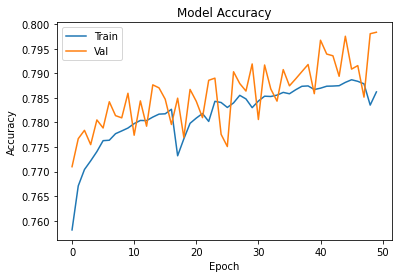

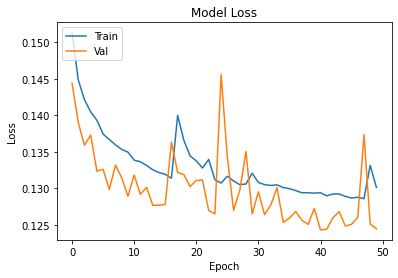

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.53%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.85%
accuracy: 83.34%
accuracy: 91.57%
accuracy: 80.44%
accuracy: 92.17%
accuracy: 81.10%
accuracy: 91.43%
accuracy: 80.73%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.16%
accuracy: 77.87%
accuracy: 88.95%
accuracy: 74.00%
accuracy: 89.54%
accuracy: 74.40%
accuracy: 88.77%
accuracy: 74.38%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 319843 samples, validate on 79961 samples
Epoch 1/50
319843/319843 [==============================] - 26s 80us/step - loss: 0.1528 - accuracy: 0.7565 - val_loss: 0.1436 - val_accuracy: 0.7653
Epoch 2/50
319843/319843 [==============================] - 26s 82us/step - loss: 0.1461 - accuracy: 0.7655 - val_loss: 0.1413 - val_accuracy: 0.7741
Epoch 3/50
319843/319843 [==============================] - 25s 78us/step - loss: 0.1437 - accuracy: 0.7683 - val_loss: 0.1422 - val_accuracy: 0.7669
Epoch 4/50
319843/319843 [==============================] - 25s 79us/step - loss: 0.1422 - accuracy: 0.7708 - val_loss: 0.1396 - val_accuracy: 0.7758
Epoch 5/50
319843/319843 [==============================] - 25s 78us/step - loss: 0.1410 - accuracy: 0.7720 - val_loss: 0.1391 - val_accuracy: 0.7735
Epoch 6/50
319843/319843 [==============================] - 25s 79us/step - loss: 0.1401 - accuracy: 0.7731 - val_loss: 0.1366 - val_accuracy: 0.7734
Epoch 7/50
319843/319843 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.11%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.10%
accuracy: 96.59%
accuracy: 97.95%
accuracy: 95.41%
accuracy: 97.40%
accuracy: 95.28%
accuracy: 97.94%
accuracy: 95.43%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.48%
accuracy: 95.47%
accuracy: 97.31%
accuracy: 93.90%
accuracy: 96.53%
accuracy: 93.61%
accuracy: 97.30%
accuracy: 93.93%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.99281648007523
Test Prediction Score 89.97808926373924


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 81.40106308294052
Test Prediction Score 83.23755991066723
Test Prediction Score 84.31926316057299
Test Prediction Score 83.91334871126266
Test Prediction Score 84.66836352747418
Test Prediction Score 83.8333374350897
Test Prediction Score 83.58140599954203
Test Prediction Score 84.17661217530839


In [0]:
y_pred_dt_test= dt.predict(test_X8)
dt_score_test = accuracy_score(test_Y8,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X9)
dt_score_test = accuracy_score(test_Y9,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X10)
dt_score_test = accuracy_score(test_Y10,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X11)
dt_score_test = accuracy_score(test_Y11,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X12)
dt_score_test = accuracy_score(test_Y12,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X13)
dt_score_test = accuracy_score(test_Y13,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X14)
dt_score_test = accuracy_score(test_Y14,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X15)
dt_score_test = accuracy_score(test_Y15,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 75.27333333333334
Test Prediction Score 77.73333333333333
Test Prediction Score 79.45666666666666
Test Prediction Score 78.61333333333333
Test Prediction Score 79.52
Test Prediction Score 78.10333333333334
Test Prediction Score 78.49000000000001
Test Prediction Score 78.96333333333332


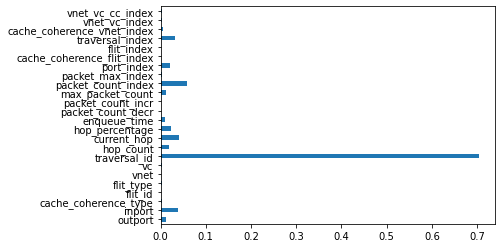

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

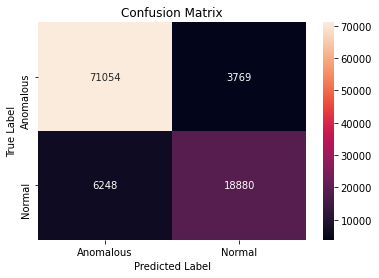

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     74823
           1       0.83      0.75      0.79     25128

    accuracy                           0.90     99951
   macro avg       0.88      0.85      0.86     99951
weighted avg       0.90      0.90      0.90     99951



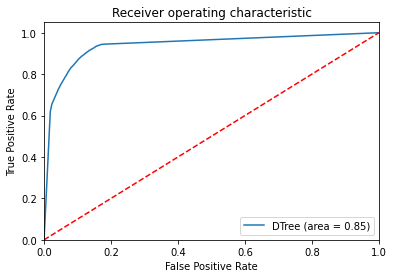

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 96.17412532140749
Test Prediction Score 92.0841212193975


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X7)
rf_score_test = accuracy_score(test_Y7,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 81.62922475178016
Test Prediction Score 84.78080851170611
Test Prediction Score 85.25303411953286
Test Prediction Score 88.33366763614482
Test Prediction Score 85.7488646004891
Test Prediction Score 88.14264267959541
Test Prediction Score 84.72890110169708
Test Prediction Score 88.69722194363655


In [0]:
y_pred_rf_test= rf.predict(test_X8)
rf_score_test = accuracy_score(test_Y8,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X9)
rf_score_test = accuracy_score(test_Y9,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X10)
rf_score_test = accuracy_score(test_Y10,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X11)
rf_score_test = accuracy_score(test_Y11,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X12)
rf_score_test = accuracy_score(test_Y12,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X13)
rf_score_test = accuracy_score(test_Y13,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X14)
rf_score_test = accuracy_score(test_Y14,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X15)
rf_score_test = accuracy_score(test_Y15,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 75.57666666666667
Test Prediction Score 79.78333333333333
Test Prediction Score 80.67999999999999
Test Prediction Score 84.49
Test Prediction Score 80.96333333333334
Test Prediction Score 83.94
Test Prediction Score 79.99333333333334
Test Prediction Score 84.97333333333333


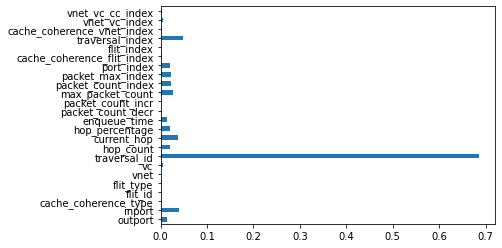

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

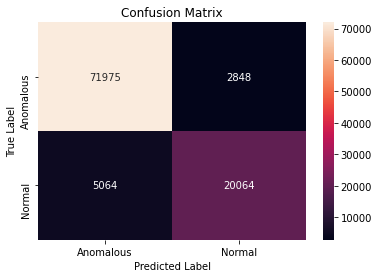

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     74823
           1       0.88      0.80      0.84     25128

    accuracy                           0.92     99951
   macro avg       0.90      0.88      0.89     99951
weighted avg       0.92      0.92      0.92     99951



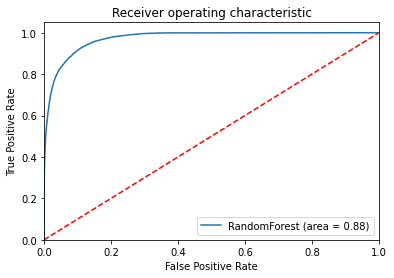

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.23763644185651
Test Prediction Score 93.96404238076657


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 81.9927790592719
Test Prediction Score 85.08443953727635
Test Prediction Score 85.91201689438466
Test Prediction Score 90.9988968007221
Test Prediction Score 84.99525877127314
Test Prediction Score 87.80055619816406
Test Prediction Score 85.23013510419052
Test Prediction Score 91.27218934911244


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X8)
xgbc_score_test = accuracy_score(test_Y8,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X9)
xgbc_score_test = accuracy_score(test_Y9,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X10)
xgbc_score_test = accuracy_score(test_Y10,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X11)
xgbc_score_test = accuracy_score(test_Y11,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X12)
xgbc_score_test = accuracy_score(test_Y12,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X13)
xgbc_score_test = accuracy_score(test_Y13,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X14)
xgbc_score_test = accuracy_score(test_Y14,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X15)
xgbc_score_test = accuracy_score(test_Y15,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 76.06
Test Prediction Score 80.18666666666667
Test Prediction Score 81.54333333333334
Test Prediction Score 88.03333333333333
Test Prediction Score 79.95666666666666
Test Prediction Score 83.47666666666666
Test Prediction Score 80.65
Test Prediction Score 88.39666666666666


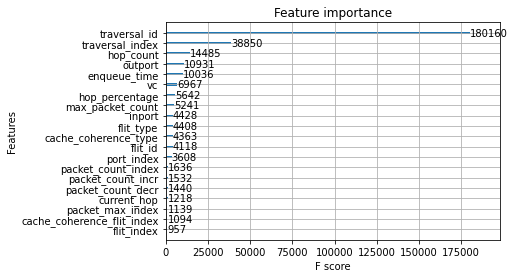

In [0]:
plot_importance(xgbc)
plt.show()

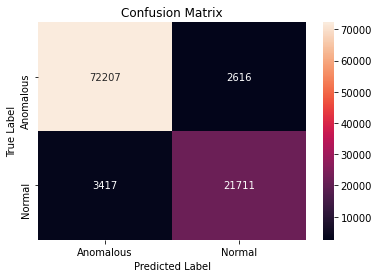

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     74823
           1       0.89      0.86      0.88     25128

    accuracy                           0.94     99951
   macro avg       0.92      0.91      0.92     99951
weighted avg       0.94      0.94      0.94     99951



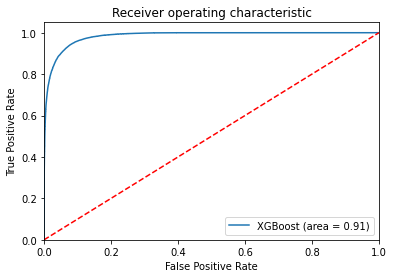

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.58768796710388
Test Prediction Score 84.69550079538975


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X7)
gbm_score_test = accuracy_score(test_Y7,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 88.85016547989169
Test Prediction Score 90.73047100449173
Test Prediction Score 89.5555046688548
Test Prediction Score 92.76401564537157
Test Prediction Score 88.80570943754054
Test Prediction Score 91.18696625895208
Test Prediction Score 89.63946772511005
Test Prediction Score 92.47066492829205


In [0]:
y_pred_gbm_test = gbm.predict(test_X8)
gbm_score_test = accuracy_score(test_Y8,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X9)
gbm_score_test = accuracy_score(test_Y9,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X10)
gbm_score_test = accuracy_score(test_Y10,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X11)
gbm_score_test = accuracy_score(test_Y11,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X12)
gbm_score_test = accuracy_score(test_Y12,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X13)
gbm_score_test = accuracy_score(test_Y13,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X14)
gbm_score_test = accuracy_score(test_Y14,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X15)
gbm_score_test = accuracy_score(test_Y15,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 85.17666666666666
Test Prediction Score 87.68666666666667
Test Prediction Score 86.31666666666666
Test Prediction Score 90.38000000000001
Test Prediction Score 85.04666666666667
Test Prediction Score 88.06333333333333
Test Prediction Score 86.42666666666666
Test Prediction Score 89.99000000000001


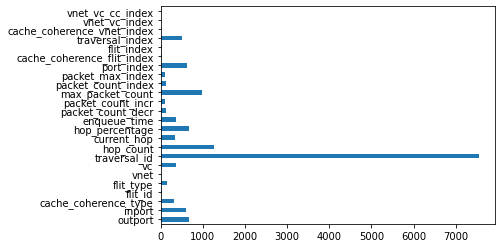

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

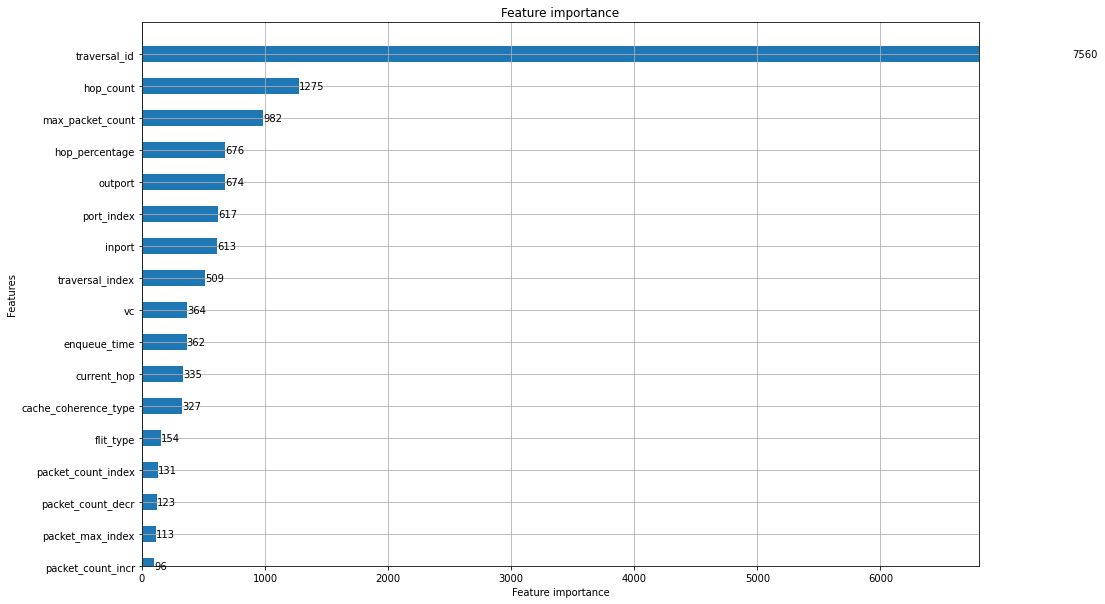

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[7560,
 1275,
 982,
 676,
 674,
 617,
 613,
 509,
 364,
 362,
 335,
 327,
 154,
 131,
 123,
 113,
 96,
 36,
 30,
 23,
 0,
 0,
 0,
 0]

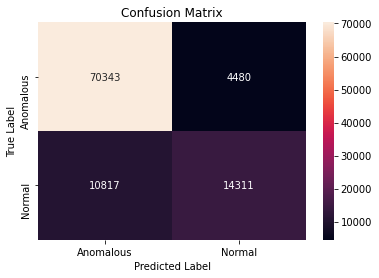

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     74823
           1       0.76      0.57      0.65     25128

    accuracy                           0.85     99951
   macro avg       0.81      0.75      0.78     99951
weighted avg       0.84      0.85      0.84     99951



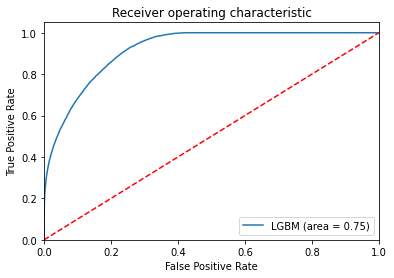

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()